In [11]:
from PIL import Image
import numpy as np
import pandas as pd

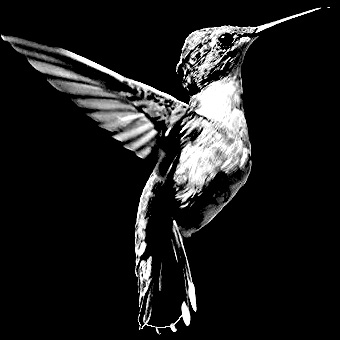

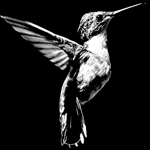

In [12]:
# load image, convert to b/w, and and specify resizing ratio
dim = 150
ratio = 1

path = r'images/Bird.jpg'
img = Image.open(path)
display(img)

width, height = img.size
ratio = height / width

img = img.resize((dim, int(dim * ratio)))
img = img.convert('L')
display(img)

width, height = img.size

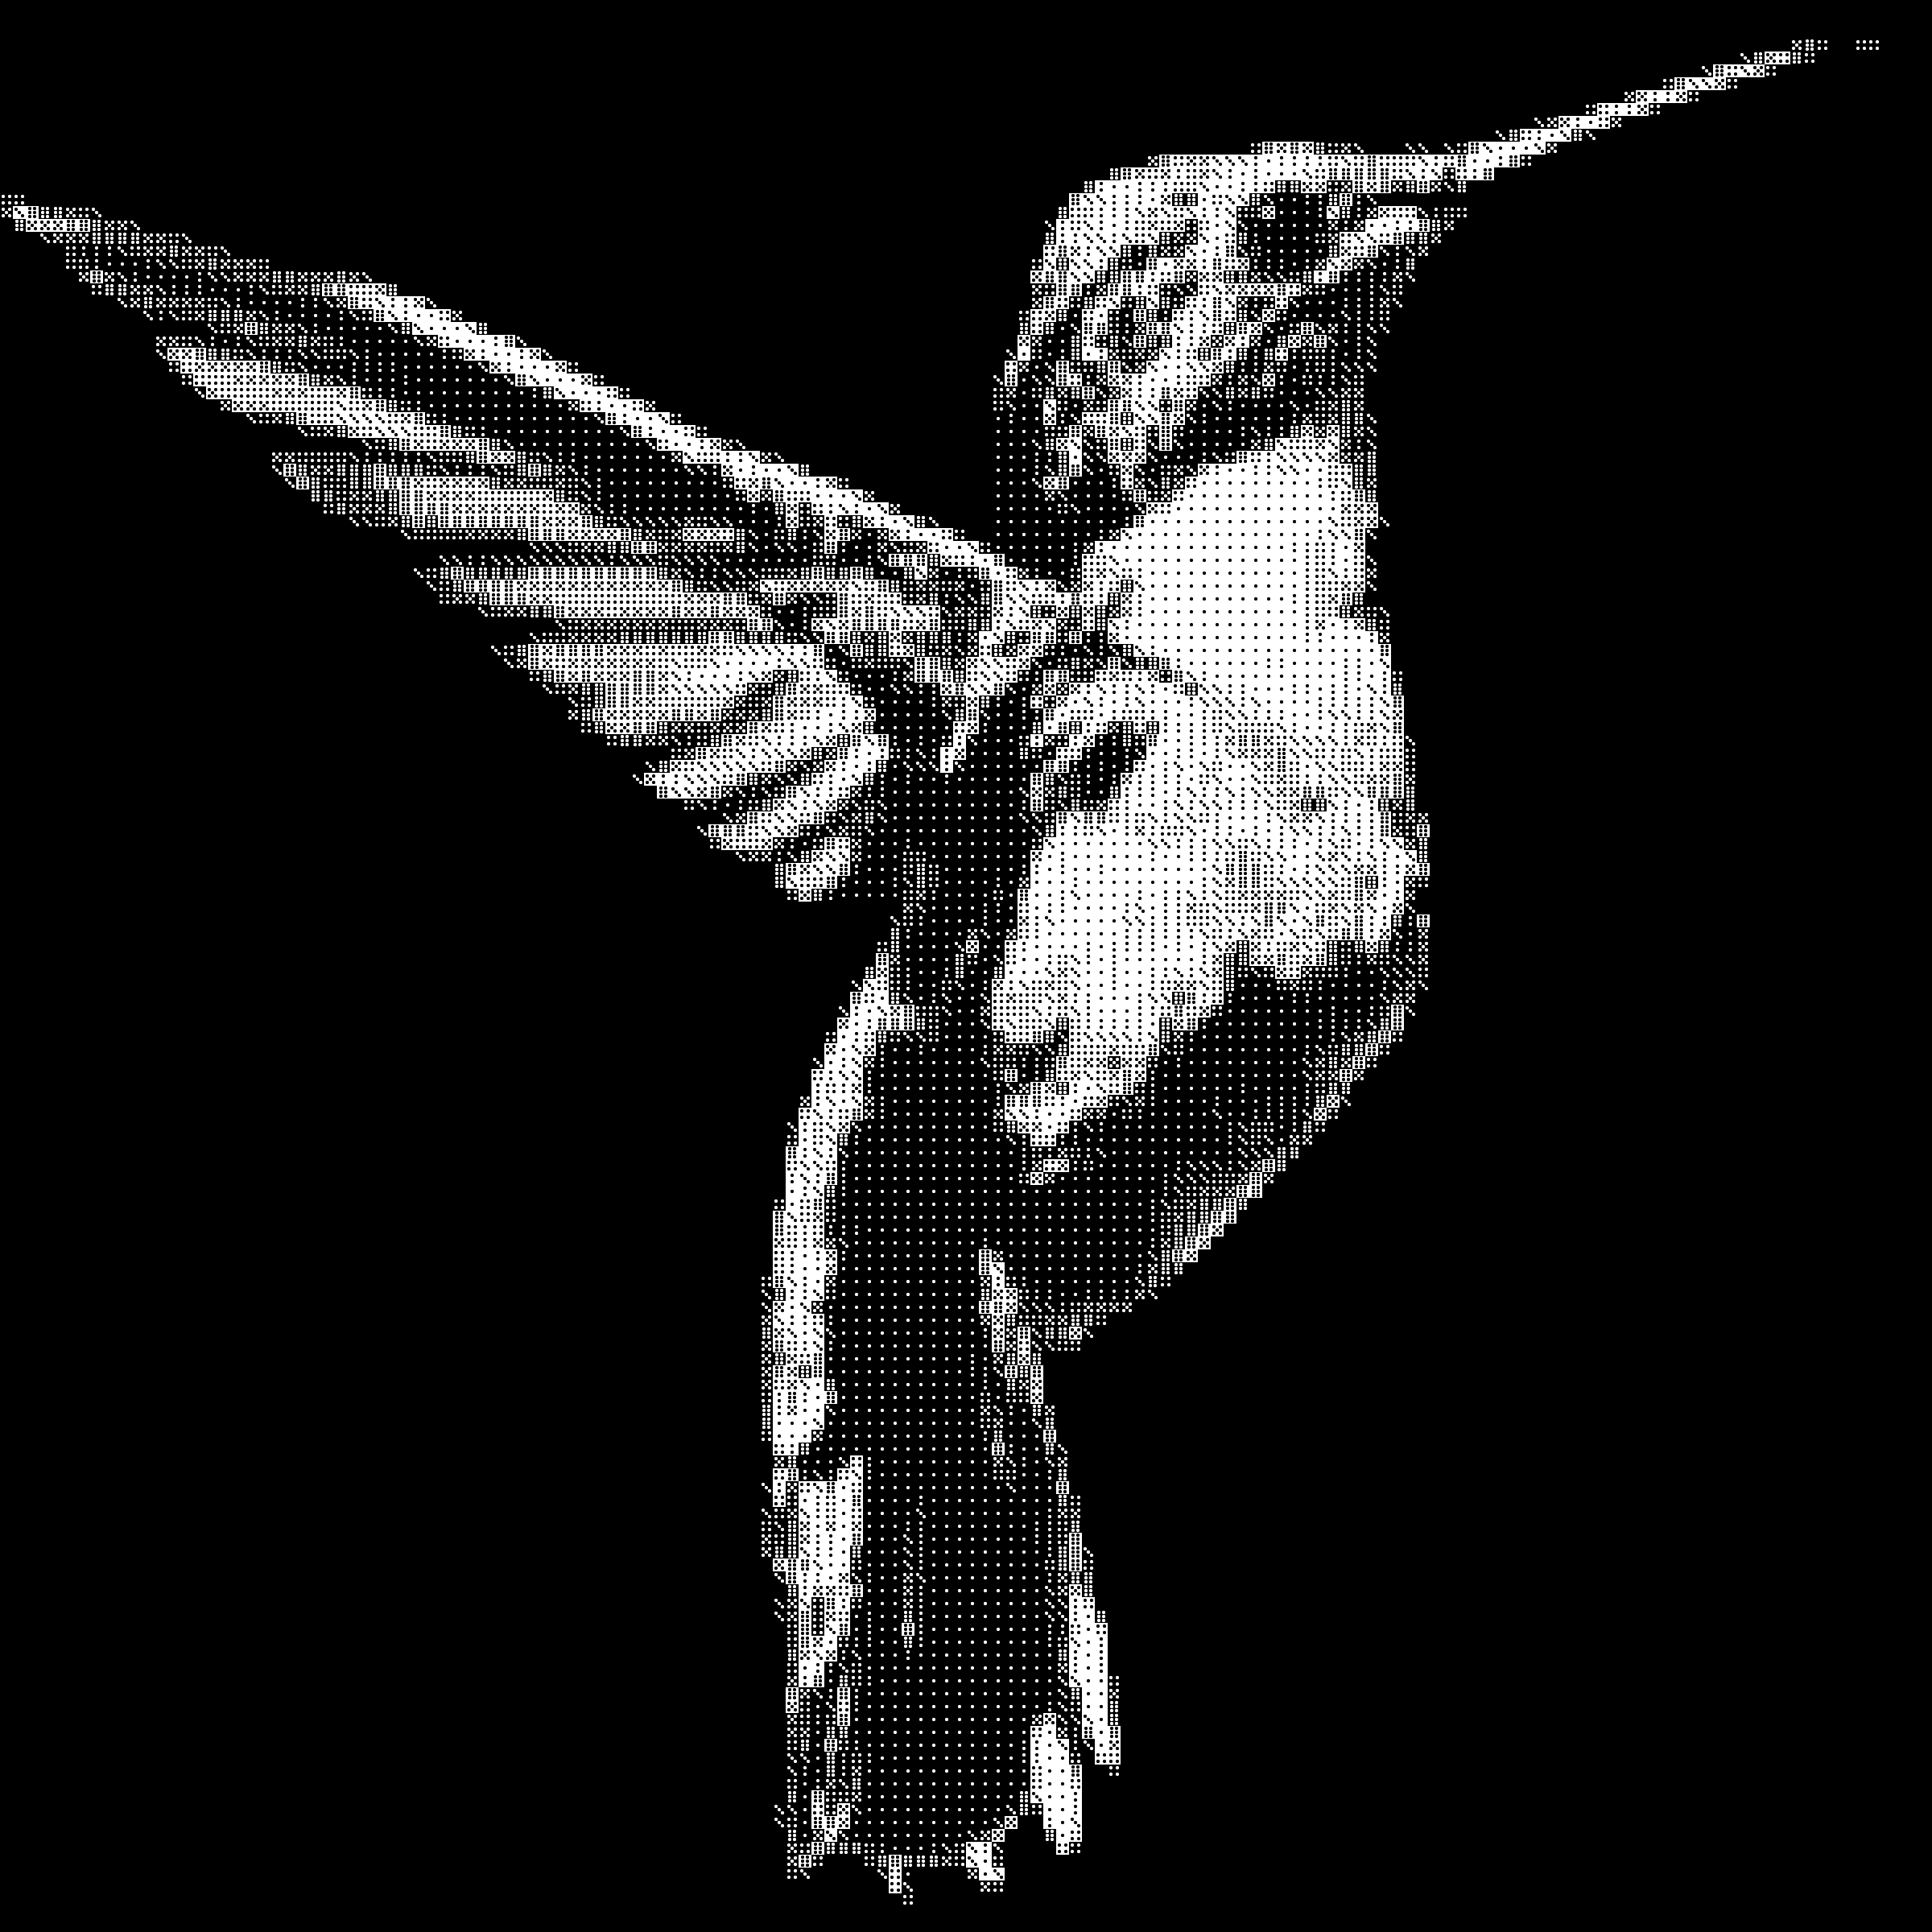

[1512, 342, 390, 375, 374, 378, 382, 405, 369, 352, 394, 533]


In [13]:
# load dice images and calculate pixel luminosity bin ranges
num_bins = 12
bins = np.asarray([x * 255 / (num_bins - 1) for x in range(num_bins)])
faces = [Image.open(r'dice_black/' + str(x) + '.png') for x in range(1, 7)] + [Image.open(r'dice_white/' + str(x) + '.png') for x in range(6, 0, -1)]
blank = Image.open(r'dice_black/0.png')

# iterate over pixels and store corresponding dice face
dice = []
for y in range(height):
    array = []
    for x in range(width):
        luminance = img.getpixel((x, y))
        dice_index = (np.abs(bins - luminance)).argmin()
        value = int(bins[dice_index])
        array.append(dice_index)
        img.putpixel((x, y), value)
    dice.append(array)

# remove continuous segments of single dot dice faces (background)
def remove_bg(array):
    for start, stop, step in [(0, len(array), 1), (len(array) - 1, -1, -1)]:
        for i in range(start, stop, step):
            if array[i] in [-1, 0, 1]:
                array[i] = -1
            else:
                break
    return array

df = pd.DataFrame(dice)
df = df.apply(lambda row: remove_bg(row), axis=0)
df = df.apply(lambda col: remove_bg(col), axis=1)
dice = df.to_numpy()

# create render of "diced" image
collage = [np.hstack([faces[x] if x != -1 else blank for x in y]) for y in dice]
collage = np.vstack([x for x in collage])

img = img.resize((dim, int(dim * ratio)), resample=Image.NEAREST)
dice_img = Image.fromarray(np.array(collage))
display(dice_img)

bin_count = [len([y for y in np.array(dice).flatten() if y == x]) for x in range(num_bins)]
print(bin_count)